 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><ul class="toc-item"><ul class="toc-item"><ul class="toc-item"><li><span><a href="http://localhost:8889/notebooks/FindKeyRiverScalingMonthly.ipynb#fig,-ax-=-plt.subplots(1,-1,-figsize=(18,-4))" data-toc-modified-id="fig,-ax-=-plt.subplots(1,-1,-figsize=(18,-4))-0.0.0.1"><span class="toc-item-num">0.0.0.1&nbsp;&nbsp;</span>fig, ax = plt.subplots(1, 1, figsize=(18, 4))</a></span></li></ul></ul></ul></ul></div>

This is monthly, previous notebook was looking at yearly

In [47]:
import arrow
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

%matplotlib inline

In [108]:
plt.rcParams['font.size'] = 14

In [73]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
days_in_month = (31, 28.25, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31)

Note, I call the rivers Squamish but I am doing all of them with this notebook

In [680]:
squamish1 = pd.read_csv('Theodosia_Scotty_flow', header=None, sep='\s+', index_col=False,
                      names=['year', 'month', 'day', 'flow'])
squamish2 = pd.read_csv('Theodosia_Bypass_flow', header=None, sep='\s+', index_col=False,
                      names=['year', 'month', 'day', 'flow'])
squamish3 = pd.read_csv('Theodosia_Diversion_flow', header=None, sep='\s+', index_col=False,
                      names=['year', 'month', 'day', 'flow'])
watershed = 'Toba'

In [681]:
for squamish in [squamish1, squamish2, squamish3]:
    length = squamish.year.shape[0]
    dates = []
    for i in range(length):
        dates.append(datetime.datetime(squamish.year[i], squamish.month[i], squamish.day[i]))
    squamish['dates'] = dates
squamish1 = squamish1.set_index('dates')
squamish2 = squamish2.set_index('dates')
squamish3 = squamish3.set_index('dates')
squamish = squamish1 + squamish3 - squamish2

In [708]:
secondary = pd.read_csv('Homathko_Mouth_flow', header=None, sep='\s+', index_col=False,
                      names=['year', 'month', 'day', 'flow'])
usesecondary = False

In [709]:
squamish = pd.read_csv('Englishman_flow', header=None, sep='\s+', index_col=False,
                      names=['year', 'month', 'day', 'flow'])
watershed = 'EVI_S'

In [31]:
squamish = pd.read_csv('river_flows/Clowhom_ClowhomLake_flow', header=None, sep='\s+', index_col=False,
                      names=['year', 'month', 'day', 'flow'])
secondary = pd.read_csv('river_flows/Roberts_Roberts_flow', header=None, sep='\s+', index_col=False,
                      names=['year', 'month', 'day', 'flow'])
usesecondary= True
watershed = 'Jervis'

In [32]:
length = squamish.year.shape[0]
dates = []
for i in range(length):
    dates.append(datetime.datetime(squamish.year[i], squamish.month[i], squamish.day[i]))
squamish['dates'] = dates
squamish = squamish.set_index('dates')
print(squamish[:5])

            year  month  day  flow
dates                             
1993-06-17  1993      6   17  23.3
1993-06-18  1993      6   18  26.6
1993-06-19  1993      6   19  25.6
1993-06-20  1993      6   20  20.8
1993-06-21  1993      6   21  18.3


In [33]:
if usesecondary:
    length = secondary.year.shape[0]
    dates = []
    for i in range(length):
        dates.append(datetime.datetime(secondary.year[i], secondary.month[i], secondary.day[i]))
    secondary['dates'] = dates
    secondary = secondary.set_index('dates')
secondary[:5]

,year,month,day,flow
dates,,,,
1959-04-28,1959,4,28,1.25
1959-04-29,1959,4,29,5.66
1959-04-30,1959,4,30,3.68
1959-05-01,1959,5,1,5.89
1959-05-02,1959,5,2,1.25


In [34]:
diffy = squamish.index[1:] - squamish.index[:-1]
diffy_data = pd.DataFrame({'date': squamish.index[1:], 
                           'year' : squamish.year[1:],
                        'gap' : diffy[:]})
diffy_data = diffy_data.set_index('date')

if usesecondary:
    diffy2 = secondary.index[1:] - secondary.index[:-1]
    diffy2_data = pd.DataFrame({'date' : secondary.index[1:],
                              'year' : secondary.year[1:],
                              'gap' : diffy2[:]})
    diffy2_data = diffy2_data.set_index('date')

In [35]:
goodyears = []
minyear = 1970
for year in range(minyear, 2010):
    maxgap = diffy_data.gap[diffy_data.year == year].max()
    if usesecondary and maxgap == maxgap:
        maxgap = max(maxgap, diffy2_data.gap[diffy2_data.year == year].max())
    if maxgap == datetime.datetime(1980, 1, 2) - datetime.datetime(1980, 1, 1):
        if squamish.flow[squamish.year == year].shape[0] >= 365:
            if not np.isnan(squamish.flow[squamish.year == year].mean(skipna=False)):
                if usesecondary:
                    if secondary.flow[secondary.year == year].shape[0] >= 365:
                        if not np.isnan(secondary.flow[secondary.year == year].mean(skipna=False)):
                            goodyears.append(year)
                else:
                    goodyears.append(year)

In [8]:
print (goodyears)

[1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009]


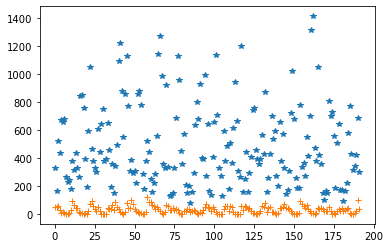

In [36]:
squamish_flux = np.zeros(12*len(goodyears))
squamish_daily = np.zeros(365*len(goodyears))
for i, year in enumerate(goodyears):
    for j, month in enumerate(months):
        squamish_flux[i*12 + j] = (squamish.flow[(squamish.year == year) & (squamish.month==j+1)].mean() * 
                                   days_in_month[j])
        if squamish_flux[i*12 + j] != squamish_flux[i*12 + j]:
            print (year, month)
    squamish_daily[i*365: (i+1)*365] = squamish.flow[(squamish.year == year)][0:365]
plt.plot(squamish_flux, '*');

if usesecondary:
    secondary_flux = np.zeros(12*len(goodyears))
    secondary_daily = np.zeros(365*len(goodyears))
    for i, year in enumerate(goodyears):
        for j, month in enumerate(months):
            secondary_flux[i*12 + j] = (secondary.flow[(secondary.year == year) & (secondary.month==j+1)].mean() * 
                                   days_in_month[j])
            if secondary_flux[i*12 + j] != secondary_flux[i*12 + j]:
                print (year, month, ' secondary', secondary_flux[i*12+j])
        secondary_daily[i*365: (i+1)*365] = secondary.flow[(secondary.year == year)][0:365]
    plt.plot(secondary_flux, '+');

<ipython-input-41-b173df2a9cde>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  squamish[squamish.year < 2010][squamish.year >= lyear]['flow'].plot(ax=ax)
<ipython-input-41-b173df2a9cde>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  squamish[squamish.year < 2010][squamish.year >= lyear]['flow'].resample(
<ipython-input-41-b173df2a9cde>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  secondary[secondary.year < 2010][secondary.year >= lyear]['flow'].plot(ax=ax)
<ipython-input-41-b173df2a9cde>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  secondary[secondary.year < 2010][secondary.year >= lyear]['flow'].resample(


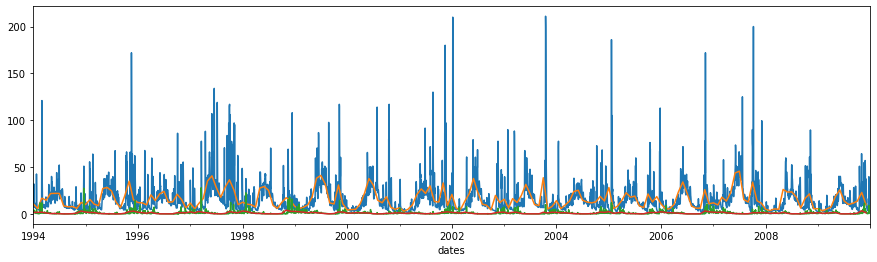

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
lyear = 1994
squamish[squamish.year < 2010][squamish.year >= lyear]['flow'].plot(ax=ax)
squamish[squamish.year < 2010][squamish.year >= lyear]['flow'].resample(
    'm').mean().plot(ax=ax)
if usesecondary:
    secondary[secondary.year < 2010][secondary.year >= lyear]['flow'].plot(ax=ax)
    secondary[secondary.year < 2010][secondary.year >= lyear]['flow'].resample(
    'm').mean().plot(ax=ax)

0.861633479595184
0.620816051959991
0.649935901165009
0.537613928318024
0.553357601165772
0.930298268795013
0.721857309341431
0.449103176593781
0.250210464000702
0.744672894477844
0.971457779407501
0.918361127376556


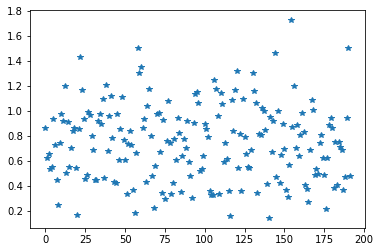

In [79]:
howe_flux = np.zeros(12*len(goodyears))
for i, year in enumerate(goodyears):
    for j, month in enumerate(months):
        morrison = pd.read_excel('Copy of Flow_Mon_X_Year.xlsx', sheet_name=str(year),
                                names=['Water Year', 'Unnamed', 'area', 'total', 'Jan',
                                                   'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
                                                   'Oct', 'Nov', 'Dec'], engine='openpyxl')
        howe_flux[i*12 +j] = morrison[month][morrison['Water Year'] == watershed]
        if year == 1994:
            print (howe_flux[i*12 + j])
plt.plot(howe_flux, '*');

Jervis
0.937734544277191
Jervis
0.747598588466644
Jervis
0.780254006385803
Jervis
0.677596569061279
Jervis
0.896801352500916
Jervis
0.953897535800934
Jervis
0.789273262023926
Jervis
0.471937984228134
Jervis
0.337518155574799
Jervis
0.704093158245087
Jervis
1.0743408203125
Jervis
0.992161095142365


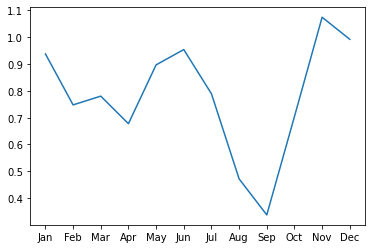

In [90]:
climate = np.zeros(12)
for j, month in enumerate(months):
    print (watershed)
    morrison2 = pd.read_excel('Copy of Flow_Mon_X_Year.xlsx', sheet_name='Normal',
                             names = ['Water Year', 'area', 'total', 'Jan',
                                                   'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
                                                   'Oct', 'Nov', 'Dec', 'Junk'], engine='openpyxl')
    climate[j] = morrison2[month][morrison2.index == watershed]
    print (climate[j])
plt.plot(months, climate);

In [84]:
morrison2

,Water Year,Unnamed,area,total,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Columbia,Column1,685292.000000,211.410000,20.290000,18.080000,19.300000,26.760000,23.970000,22.460000,15.430000,12.110000,9.630000,10.550000,13.890000,18.950000,NaN
Fraser,NaN,235396.003181,111.944478,4.677457,3.908139,4.425884,6.617468,15.517584,21.252230,17.681072,11.542284,7.686703,6.750496,6.720601,5.164561,0.823984
Nass,NaN,55242.343828,100.710600,5.981985,5.101757,4.850020,6.667318,10.945331,13.133337,10.032291,7.717140,7.868610,11.842194,8.871496,7.699121,NaN
Stikine,NaN,75670.000847,95.197118,6.050361,5.410818,4.840972,4.507800,7.009562,9.892276,9.666977,8.272748,11.529243,11.495540,7.980250,8.540571,NaN
Caamano,NaN,30857.719360,78.185262,5.428343,3.894779,3.896798,5.021444,7.101933,8.106097,7.649526,6.156513,6.792955,9.594662,7.900700,6.641513,NaN
WVI,NaN,16932.120239,52.634166,6.255283,5.022522,4.418494,4.182978,4.655321,4.027434,2.691702,1.807035,2.004359,4.127758,6.633032,6.808249,NaN
Skeena,NaN,56272.000671,49.296749,1.435487,1.104727,1.143953,2.319817,8.236003,11.265835,7.141410,3.955770,3.405269,4.416167,2.929732,1.942581,NaN
Hakai,NaN,32516.159851,47.508506,2.648836,1.891646,1.831015,2.333735,4.788220,6.578314,6.352093,5.517066,4.475223,4.497941,3.457951,3.136466,NaN
Knight,NaN,19436.999981,36.792139,1.679822,0.878393,1.337789,1.832101,3.603825,5.180463,5.937473,5.311687,3.843059,3.157359,2.417451,1.612718,NaN
WC,NaN,15881.999512,33.320165,5.243871,3.781510,3.524299,2.541869,1.961753,1.477248,0.934686,0.659940,0.839207,2.229037,4.748279,5.378468,NaN


93228.19734605911
143.04009938240057
17.75811131121055
143.04009938240057
6.194846054855879
6.3288484000881375
10.516828343440109


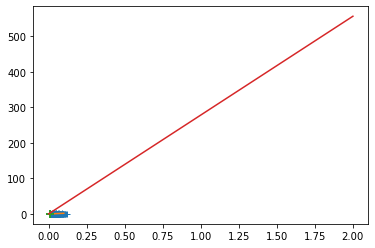

In [14]:
plt.plot(squamish_flux*86400/1e9, howe_flux, '+');
print (squamish_flux.sum())
print (howe_flux.sum())
slope = howe_flux.sum()/(squamish_flux.sum()*86400/1e9)
print (slope)
plt.plot([0, 0.1], [0, 0.1*slope])
weight_prediction = slope*(squamish_flux*86400/1e9)
print (weight_prediction.sum())
print (np.sqrt(((weight_prediction-howe_flux)**2).sum()))

if usesecondary:
    plt.plot(secondary_flux*86400/1e9, howe_flux, '+');
    slope2 = howe_flux.sum()/(secondary_flux.sum()*86400/1e9)
    plt.plot([0, 2], [0, 2*slope2])
    weight_prediction2 = slope2*(secondary_flux*86400/1e9)
    print (np.sqrt(((weight_prediction2-howe_flux)**2).sum()))
    print (np.sqrt(((weight_prediction2-weight_prediction)**2).sum()))


In [15]:
model = LinearRegression(fit_intercept=True)

model.fit(squamish_flux[:, np.newaxis]*86400/1e9, howe_flux)

xfit = np.linspace(0, 0.1, 10)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(squamish_flux*86400/1e9, howe_flux)
plt.plot(xfit, yfit, 'r');
print (model.predict(squamish_flux[:, np.newaxis]*86400/1e9).sum())
print (howe_flux.sum())
print (model.coef_, model.intercept_)
linear_slope = model.coef_
linear_intercept = model.intercept_
linear_predictions =model.predict(squamish_flux[:, np.newaxis]*86400/1e9)

NameError: name 'LinearRegression' is not defined

0.3561139264008444
114.07291156388585


array([14.16189915])

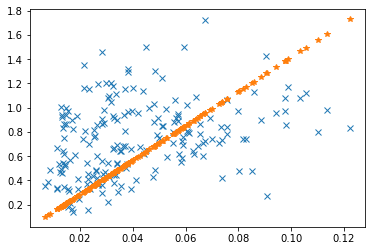

In [16]:
X = squamish_flux*86400/1e9
y = howe_flux

# Fit and make the predictions by the model
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

plt.plot(X, y, 'x')
plt.plot(X, predictions,'*')
# Print out the statistics
print ((np.sqrt(((predictions-y)**2).sum()))/len(goodyears))
print(predictions.sum())
model.params

0.21346351552
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     987.7
Date:                Mon, 22 Apr 2019   Prob (F-statistic):          5.69e-105
Time:                        15:28:43   Log-Likelihood:                -119.81
No. Observations:                 360   AIC:                             243.6
Df Residuals:                     358   BIC:                             251.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2995      0.025     1

array([  0.29946029,  16.12953612])

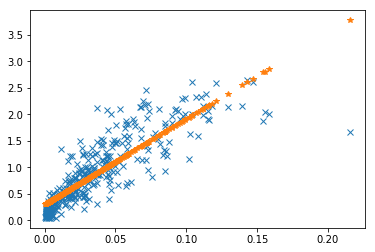

In [720]:
x = squamish_flux*86400/1e9
X = x 
X = sm.add_constant(X)
y = howe_flux

# Fit and make the predictions by the model
model = sm.OLS(y, X).fit()
predictions2 = model.predict(X)
plt.plot(x, y, 'x')
plt.plot(x, predictions2,'*')
# Print out the statistics
print ((np.sqrt(((predictions2-y)**2).sum()))/len(goodyears))
print(model.summary())
model.params

0.232 0.185551677812
0.233 0.185551649595
0.234 0.185551649959

0.20539118407539908
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.913
Model:                            OLS   Adj. R-squared (uncentered):              0.912
Method:                 Least Squares   F-statistic:                              996.9
Date:                Wed, 07 Jul 2021   Prob (F-statistic):                   1.80e-101
Time:                        11:29:33   Log-Likelihood:                          3.8514
No. Observations:                 192   AIC:                                     -3.703
Df Residuals:                     190   BIC:                                      2.812
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------

array([  8.13779386, 129.63487875])

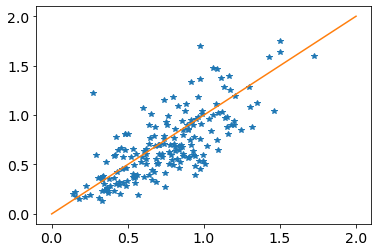

In [138]:
# Standard Version
x = squamish_flux*86400/1e9
x2 = secondary_flux*86400/1e9
X = np.column_stack((x, x2))
#X = sm.add_constant(X)
y = howe_flux

# Fit and make the predictions by the model
model = sm.OLS(y, X).fit()
predictions4 = model.predict(X)
#plt.plot(x, y, 'x')
plt.plot(y, predictions4,'*')
plt.plot ([0, 2], [0, 2], '-')
# Print out the statistics
print ((np.sqrt(((predictions4-y)**2).sum()))/len(goodyears))
print(model.summary())
print (predictions4.sum())
print (howe_flux.sum())
upit = howe_flux.sum()/predictions4.sum()
coeffs = model.params


coeffs

77.94140257870336
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.913
Model:                            OLS   Adj. R-squared (uncentered):              0.912
Method:                 Least Squares   F-statistic:                              996.9
Date:                Wed, 07 Jul 2021   Prob (F-statistic):                   1.80e-101
Time:                        11:24:28   Log-Likelihood:                         -1136.4
No. Observations:                 192   AIC:                                      2277.
Df Residuals:                     190   BIC:                                      2283.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

array([  8.13779386, 129.63487875])

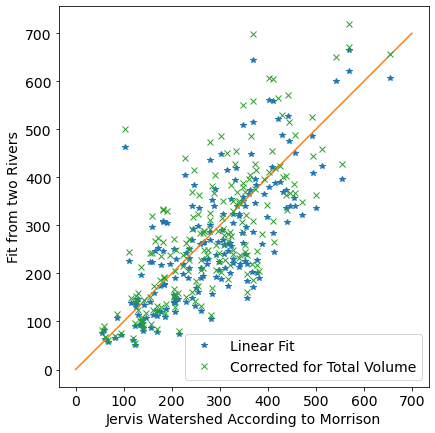

In [131]:
# For Talk, change units, not as good as not taking into account the length of the months

fig, ax = plt.subplots(1, 1, figsize=(7, 7))
x = squamish_flux/30.5 #*86400/1e9
x2 = secondary_flux/30.5 #*86400/1e9
X = np.column_stack((x, x2))
#X = sm.add_constant(X)
y = howe_flux/86400*1e9/30.5

# Fit and make the predictions by the model
model = sm.OLS(y, X).fit()
predictions4 = model.predict(X)
#plt.plot(x, y, 'x')
ax.plot(y, predictions4,'*', label='Linear Fit')

ax.plot ([0, 700], [0, 700], '-')
# Print out the statistics
print ((np.sqrt(((predictions4-y)**2).sum()))/len(goodyears))
print(model.summary())
print (predictions4.sum())
print (howe_flux.sum())
upit = howe_flux.sum()/86400*1e9/30.5/predictions4.sum()
ax.plot(y, predictions4*upit, 'x', label="Corrected for Total Volume")
coeffs = model.params
ax.set_aspect('equal')
ax.set_xlabel("Jervis Watershed According to Morrison")
ax.set_ylabel("Fit from two Rivers")
ax.legend()
plt.savefig('fit.png', dpi=150)
coeffs

0.06 0.188429733902
0.07 0.187142663881
0.077 0.186869763956
0.078 0.186862723836
0.079 0.186862648103
0.08  0.186869233174
0.083 0.186926112261
0.085 0.186992337482
0.09 0.187243342386
0.095 0.187596497167
0.1  0.188030978995
0.12 0.190287497497
0.14 0.192933188799
0.15 0.194294037563
0.16 0.195648948532
0.17 0.196983887632
0.18 0.19828960825
0.19 0.199560203113
0.20 0.200792103727
0.21 0.20198338205
0.22 0.20313325895

In [ ]:
x = squamish_flux*86400/1e9
X = x/(0.079+x)
#X = sm.add_constant(X)
y = howe_flux - x

# Fit and make the predictions by the model
model = sm.OLS(y, X).fit()
predictions5 = model.predict(X)
plt.plot(x, y+x, 'x')
plt.plot(x, predictions5+x,'*')
plt.plot(x, predictions4, 'o')
# Print out the statistics
print ((np.sqrt(((predictions5-y)**2).sum()))/len(goodyears))
print(model.summary())
model.params

0.37754194315
0.834040046503 1


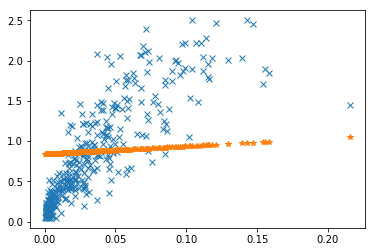

In [723]:
X = squamish_flux*86400/1e9
b = howe_flux.mean() - X.mean()
predictions3 = b + X

# Fit and make the predictions by the model
plt.plot(x, y, 'x')
plt.plot(x, predictions3,'*')
# Print out the statistics
print ((np.sqrt(((predictions3-y)**2).sum()))/len(goodyears))
print (b, '1')

In [724]:
k = int(howe_flux.shape[0]/10)
idx = np.argpartition(howe_flux, k)
idz = np.argpartition(howe_flux, -k)
hf_low = howe_flux[idx[:k]].sum()
hf_high = howe_flux[idz[-k:]].sum()
idx = np.argpartition(weight_prediction, k)
idz = np.argpartition(weight_prediction, -k)
wp_low = weight_prediction[idx[:k]].sum()
wp_high = weight_prediction[idz[-k:]].sum()
idx = np.argpartition(linear_predictions, k)
idz = np.argpartition(linear_predictions, -k)
lp_low = linear_predictions[idx[:k]].sum()
lp_high = linear_predictions[idz[-k:]].sum()
# alpha * wp + (1 - alpha) * lp) = hf
# alpha (wp-lp) + lp = hf
alpha_low = (hf_low - lp_low)/(wp_low - lp_low)
alpha_high = (hf_high - lp_high)/(wp_high - lp_high)
print (alpha_low, alpha_high)
alpha = 0.5 * (alpha_low+alpha_high)
print (alpha)
mixed_predictions = alpha*weight_prediction + (1-alpha)*linear_predictions

0.801461359328 0.0693378414462
0.435399600387


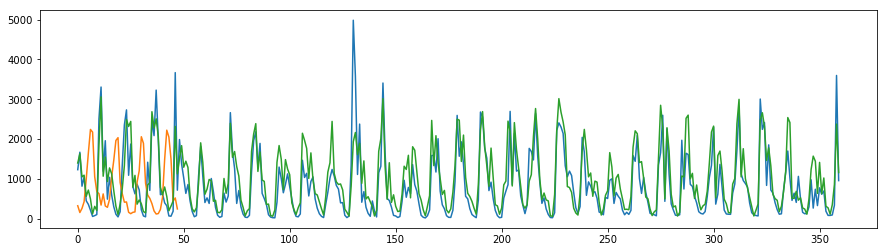

In [725]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
plt.plot(squamish_flux*2)
plt.plot(secondary_flux/10.)
plt.plot(howe_flux*1e9/86400/10);

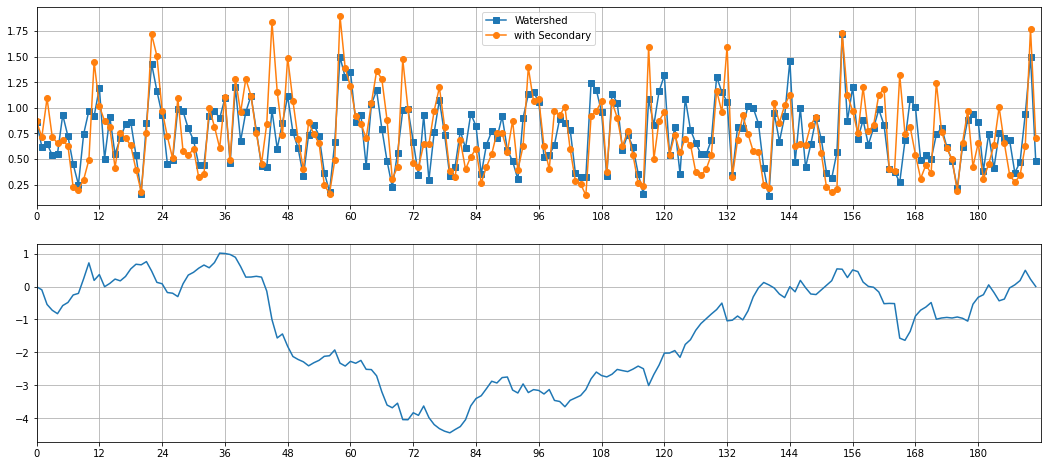

In [25]:
fig, axs = plt.subplots(2, 1, figsize=(18, 8))
#axs[0].plot(weight_prediction2, '<-', label='weight secondary')
#plt.plot(linear_predictions,'+-', label='linear')
#plt.plot(mixed_predictions, 'o-', label='mixed')
#plt.plot(predictions2,'x-', label="with const")
axs[0].plot(howe_flux, 's-', label='Watershed')
#plt.plot(predictions3,'*-', label="1x and const")
axs[0].plot(predictions4*upit,'o-', label="with Secondary")
#plt.plot(predictions5+x,'^-', label="1x Menton")
axs[0].legend()
axs[1].plot(np.cumsum(howe_flux - predictions4*upit))
#axs[1].plot(np.cumsum(howe_flux - weight_prediction2))
#axs[1].plot(np.cumsum(howe_flux - predictions4*upit))
for ax in axs:
    ax.set_xticks(range(0, 192, 12))
    ax.grid()
    ax.set_xlim(0, 192);

The mixed does better in the lows and the total is correct for all of these.

[ 154.   86.   53.   25.   20.   14.    2.    5.    0.    0.    1.    0.]
[ 139.   95.   59.   36.   27.    4.    0.    0.    0.    0.    0.    0.]


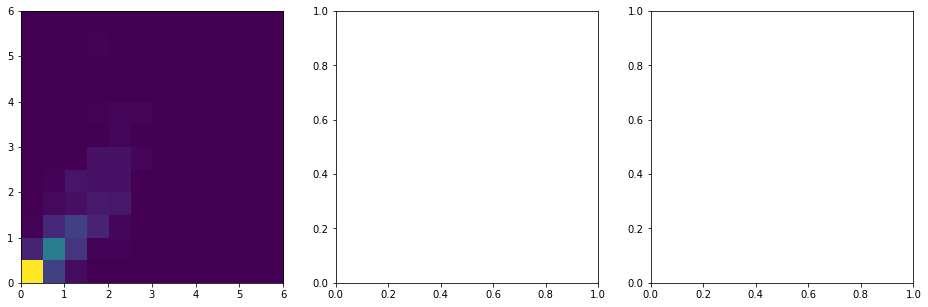

In [732]:
bins = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6]
fig, axs = plt.subplots(1, 3, figsize=(16, 5))
print(axs[0].hist2d(howe_flux, weight_prediction, bins=bins)[0].sum(axis=0));
#print(axs[1].hist2d(howe_flux, weight_prediction2, bins=bins)[0].sum(axis=0));
#print(axs[2].hist2d(howe_flux, (predictions4*upit), bins=bins)[0].sum(axis=0))
print(axs[0].hist2d(howe_flux, weight_prediction, bins=bins)[0].sum(axis=1))

In [733]:
myslope = alpha * slope + (1-alpha) * linear_slope
myintercept = ((1 - alpha) * linear_intercept / (365/12.))*1e9/86400
print (myintercept, myslope, slope)

64.3361494253 [ 19.81965516] 24.6047828461


(0, 4000)

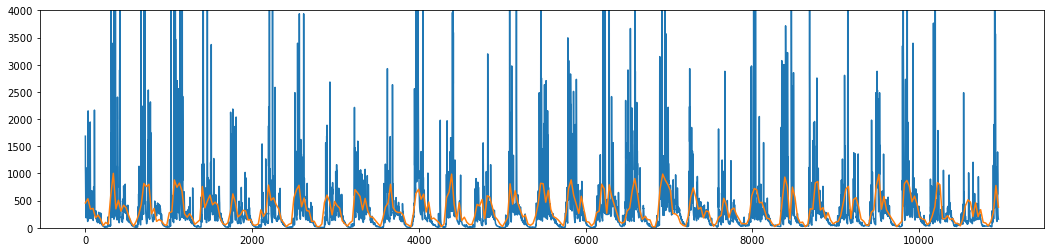

In [736]:
fig, ax = plt.subplots(1, 1, figsize=(18, 4))
xx = squamish_daily
xy = secondary_daily

#plt.plot(range(len(xx)), slope2 * xy)
#plt.plot(range(len(xx)),  (coeffs[0]*xx +  coeffs[1]*xy)*upit)
plt.plot(range(len(xx)), slope * xx)
plt.plot(np.arange(0, 30.5*len(mixed_predictions), 30.5), howe_flux/30.5*1e9/86400, label='Morrison')
plt.ylim(0, 4000)

In [21]:
print((coeffs[0]*upit, coeffs[1]*upit))

(8.80988124160506, 140.34121604293424)


In [ ]:
### Homathko_Mouth for Bute.  Multiply by 2.015 or (61.17 + 1.785 x)
### Clowhom_ClowhomLake and Roberts_Roberts for Jervis. 8.810*Clowhom + 140.3*Roberts
### Squamish_Brackendale for Howe. Multiply by 2.276 or (89.00 + 1.893 x)
### SanJuan_PortRenfrew for JdF. Multiply by 8.501 or (32.837 + 7.801 x)
### Salmon_Sayward for EVI_N, Multiply by 10.334 or (152.15 + 7.859 x)
### Englishman for EVI_S, 24.60*Englishman   # looked at other rivers, but they are similar
### Theodosia and Homathko for Toba, 14.58*Theodosia + 0.4563*Homathko
### Skagit and Snohomish for Skagit, 1.267*Skagit + 1.236*Snohomish
### Nisqually and Greenwater for Puget, 8.790*Nisqually + 29.09*Greenwater

In [ ]:
bute_flux = np.zeros((2010-1970+1, 12))
for i, year in enumerate(range(1970, 2010+1)):
    morrison = pd.read_excel('Copy of Flow_Mon_X_Year.xlsx', sheetname=str(year))
    bute_flux[i, :] = morrison[morrison['Water Year'] == watershed].iloc[:, 4:16]

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
for i in range(12):
    ax.plot(np.arange(1970, 2010+1)+i/12.+1/12., bute_flux[:, i], '*');
monthly = squamish['flow'].resample('1M').mean()
ax.plot(monthly.index.year + (monthly.index.month)/12., monthly*30.5*86400/1e9*2, 'x-')
ax.set_xlim(2000, 2010)

In [93]:
start = datetime.datetime(1994, 1, 15)
end = datetime.datetime(2009, 12, 15)
months = []
for month in arrow.Arrow.range('month', start, end):
    months.append(month.datetime)

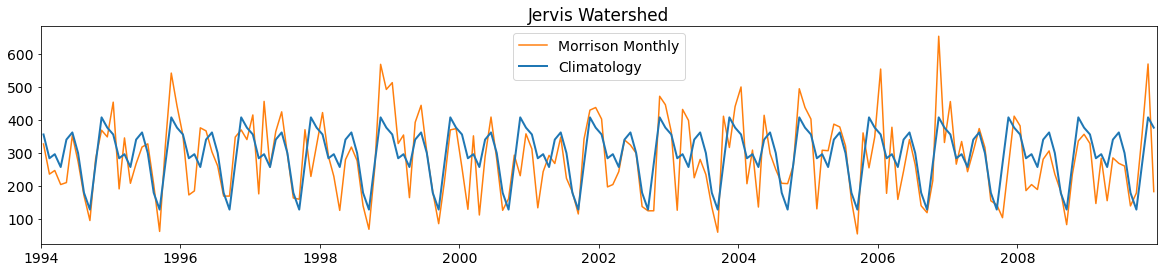

In [109]:
fig, ax = plt.subplots(1, 1, figsize=(20, 4))
lyear = 1994
#squamish.flow.plot(ax=ax, alpha=0.2)
#if usesecondary:
#    secondary.flow.plot(ax=ax, alpha=0.2)
ax.plot(months, howe_flux/30.5*1e9/86400, label='Morrison Monthly', color='tab:orange')
ax.plot(months, np.stack([climate]*16).flatten()/30.5*1e9/86400,label='Climatology', linewidth=2, color='tab:blue')
#(coeffs[0] * upit * squamish.flow + coeffs[1] * upit * secondary.flow).plot(ax=ax, alpha=0.5)
ax.set_xlim(datetime.datetime(1994, 1, 1), datetime.datetime(2009, 12, 31));
ax.legend();
ax.set_title("Jervis Watershed")
plt.savefig('operational_rivers.png', dpi=150)

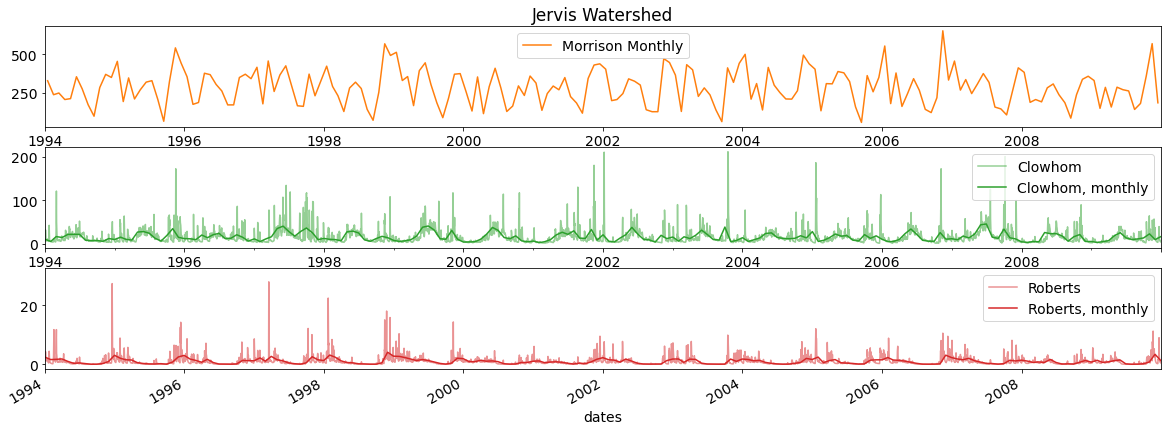

In [116]:
fig, axs = plt.subplots(3, 1, figsize=(20, 7))
lyear = 1994
squamish.flow.plot(ax=axs[1], alpha=0.5, color='tab:green', label="Clowhom")
squamish.flow.resample(
    'm').mean().plot(ax=axs[1], color='tab:green',label="Clowhom, monthly")
if usesecondary:
    secondary.flow.plot(ax=axs[2], alpha=0.5, color='tab:red', label='Roberts')
    secondary.flow.resample('m').mean().plot(ax=axs[2], color='tab:red', label='Roberts, monthly')
axs[0].plot(months, howe_flux/30.5*1e9/86400, label='Morrison Monthly', color='tab:orange')
#ax.plot(months, np.stack([climate]*16).flatten()/30.5*1e9/86400,label='Climatology', linewidth=2, color='tab:blue')
#(coeffs[0] * upit * squamish.flow + coeffs[1] * upit * secondary.flow).plot(ax=ax, alpha=0.5)
for ax in axs:
    ax.set_xlim(datetime.datetime(1994, 1, 1), datetime.datetime(2009, 12, 31));
    ax.legend();
axs[0].set_title("Jervis Watershed")
plt.savefig('candidate_rivers.png', dpi=150)

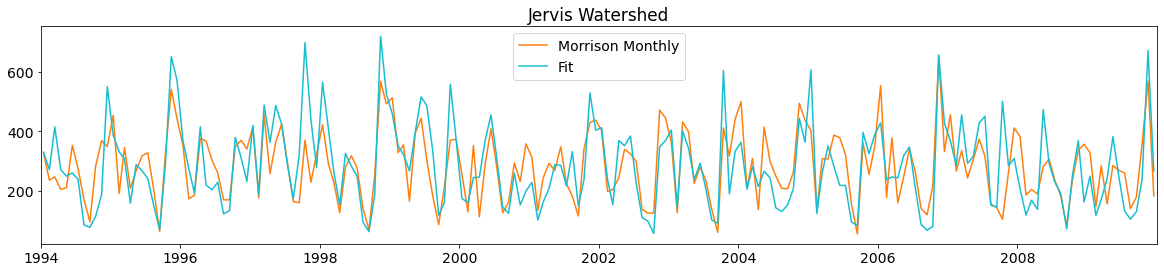

In [142]:
fig, ax = plt.subplots(1, 1, figsize=(20, 4))
lyear = 1994
#squamish.flow.plot(ax=ax, alpha=0.2)
#if usesecondary:
#    secondary.flow.plot(ax=ax, alpha=0.2)
ax.plot(months, howe_flux/30.5*1e9/86400, label='Morrison Monthly', color='tab:orange')
#ax.plot(months, np.stack([climate]*16).flatten()/30.5*1e9/86400,label='Climatology', linewidth=2, color='tab:blue')
ax.plot(months, (coeffs[0] * upit * squamish_flux + coeffs[1] * upit * secondary_flux)/30.5, 
        color='tab:cyan', label='Fit')
ax.set_xlim(datetime.datetime(1994, 1, 1), datetime.datetime(2009, 12, 31));
ax.legend();
ax.set_title("Jervis Watershed")
plt.savefig('timeseries_fit.png', dpi=150)

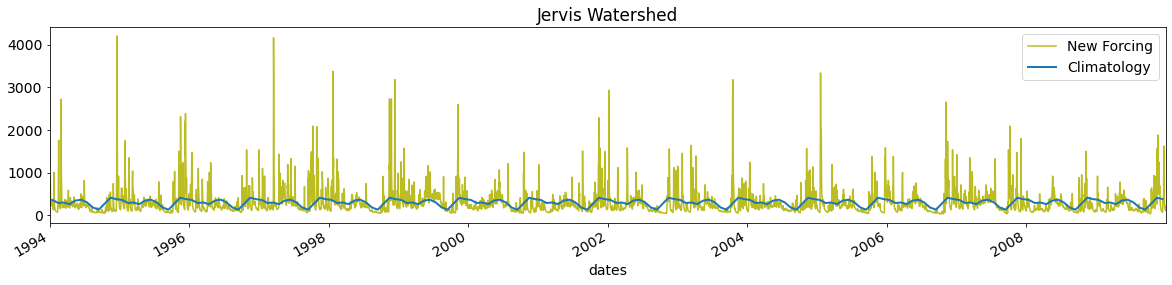

In [147]:
fig, ax = plt.subplots(1, 1, figsize=(20, 4))
lyear = 1994
#squamish.flow.plot(ax=ax, alpha=0.2)
#if usesecondary:
#    secondary.flow.plot(ax=ax, alpha=0.2)
#ax.plot(months, howe_flux/30.5*1e9/86400, label='Morrison Monthly', color='tab:orange')
(coeffs[0] * upit * squamish.flow + coeffs[1] * upit * secondary.flow).plot(ax=ax, color='tab:olive', label='New Forcing')
ax.plot(months, np.stack([climate]*16).flatten()/30.5*1e9/86400,label='Climatology', linewidth=2, color='tab:blue')
ax.set_xlim(datetime.datetime(1994, 1, 1), datetime.datetime(2009, 12, 31));
ax.legend();
ax.set_title("Jervis Watershed")
plt.savefig('NetChange.png', dpi=150)